In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
df = pd.read_csv("diabetes.csv")

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Data Exploration
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nHead:\n", df.head())
print("\nInfo:\n")
print(df.info())

Shape: (768, 9)

Columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 colum

In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

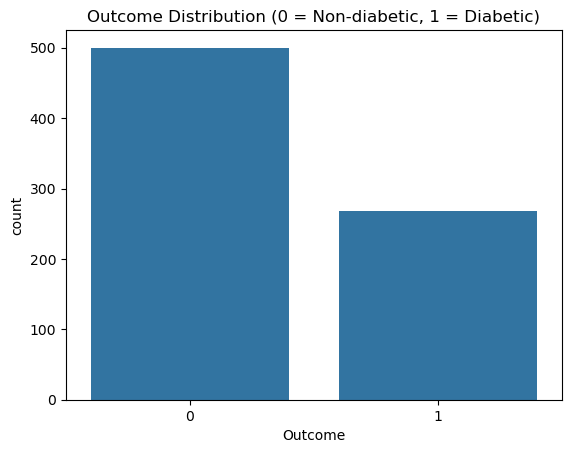

In [69]:
sns.countplot(x="Outcome", data=df)
plt.title("Outcome Distribution (0 = Non-diabetic, 1 = Diabetic)")
plt.show()

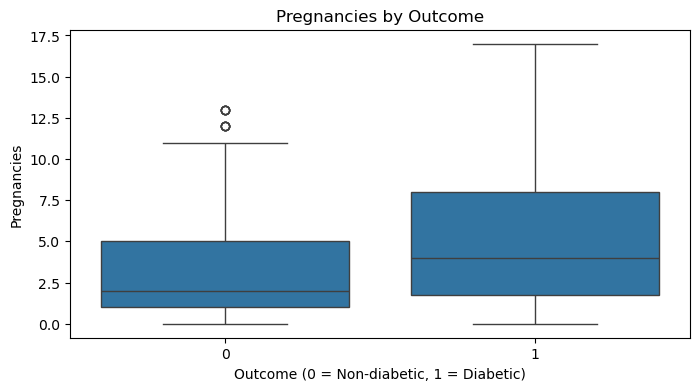

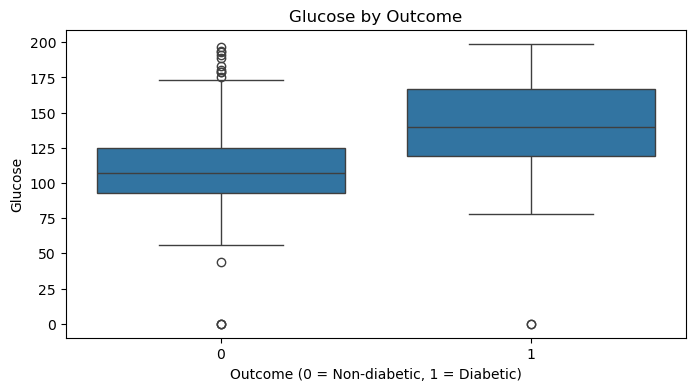

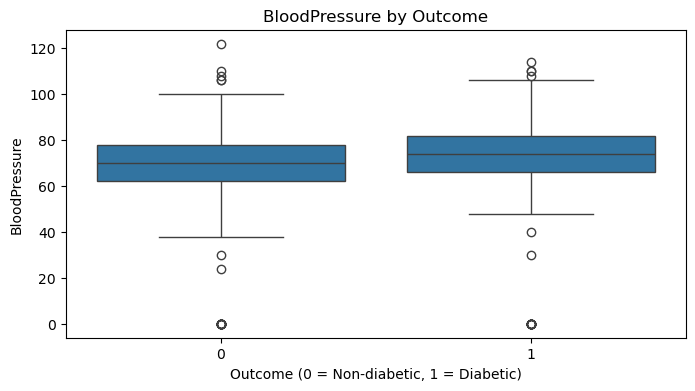

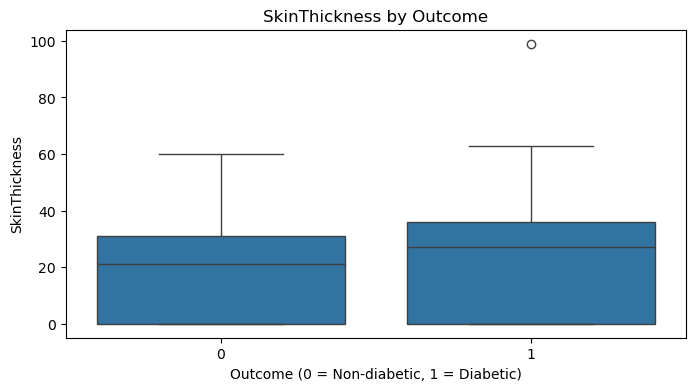

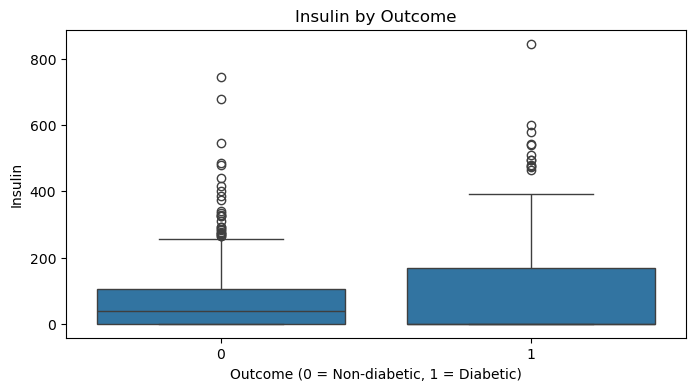

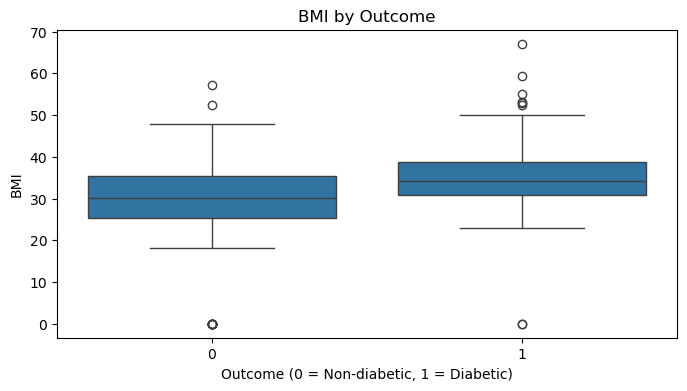

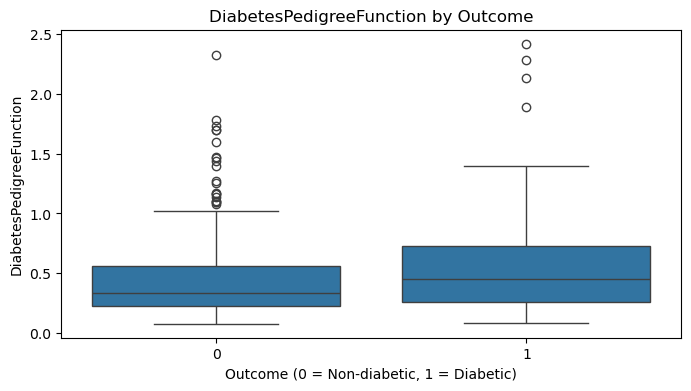

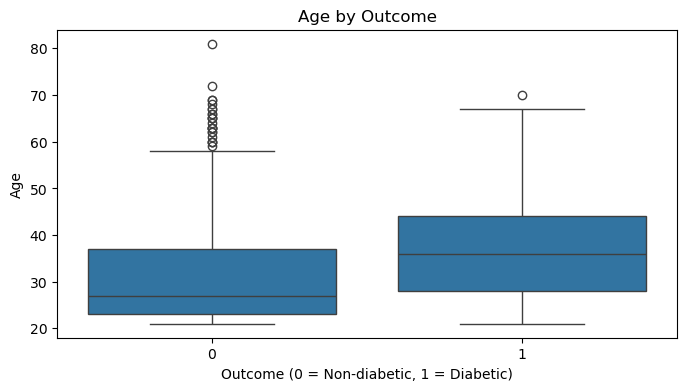

In [70]:
numeric_cols = df.columns.drop("Outcome")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} by Outcome")
    plt.xlabel("Outcome (0 = Non-diabetic, 1 = Diabetic)")
    plt.ylabel(col)
    plt.show()

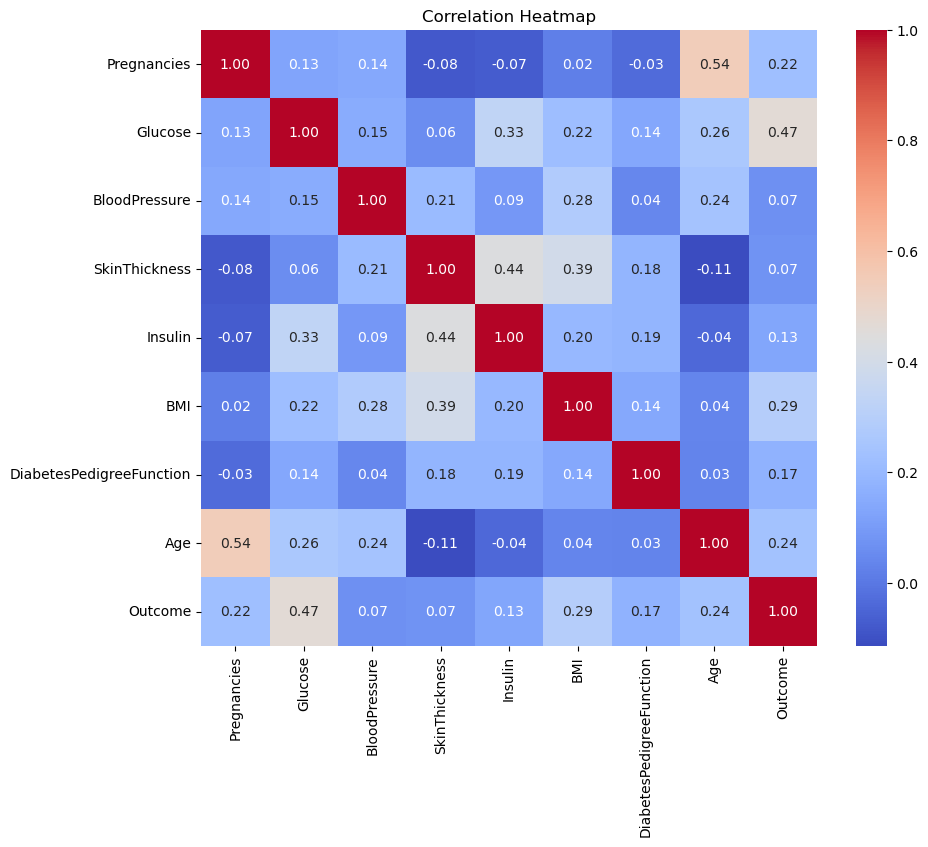

In [71]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

Higher Glucose, BMI, DiabetesPedigreeFunction, and Age values appear more common among diabetic patients (Outcome = 1) than non-diabetics. Pregnancies also tend to be higher in the diabetic group, reflecting age and parity effects. Some physiological variables like Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain zeros, suggesting missing or unrecorded measurements that should be treated carefully before modeling. Relationships between predictors themselves are moderate at best, so multicollinearity is limited, and each feature can add incremental information for diabetes prediction

In [72]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Imputation using Median
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)
# Check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [75]:
df['Outcome'] = df['Outcome'].astype(int)

# Verify encoding
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [77]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [81]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [84]:

# Model Evaluation Metrics

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)


Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-score : 0.56
ROC-AUC  : 0.8229629629629629


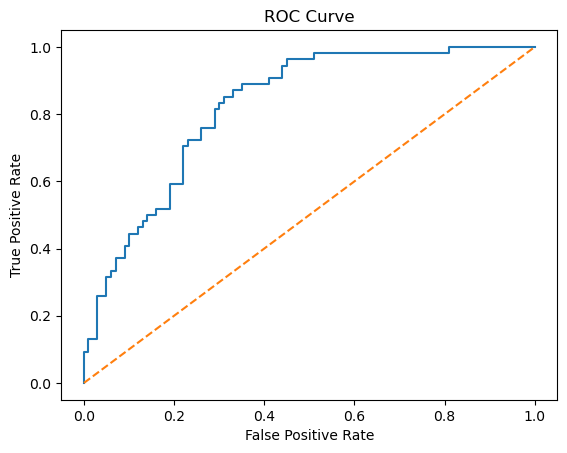

In [85]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In this logistic regression model, features contribute differently to predicting diabetes (survival vs. non‑survival analogy). Glucose typically emerges as the most important predictor, with higher values strongly increasing the probability of a positive Outcome. BMI and Age also show substantial positive effects, indicating that obesity and older age are associated with higher diabetes risk. Pregnancies often has a moderate positive coefficient, reflecting slightly higher risk with more pregnancies, consistent with gestational diabetes links. DiabetesPedigreeFunction captures genetic predisposition; higher values increase the odds of diabetes, highlighting the role of family history. BloodPressure, SkinThickness and Insulin can be informative but sometimes have smaller or unstable coefficients due to missingness and collinearity, so their individual impact may appear limited in the model. Overall, glucose, BMI, age and hereditary factors dominate risk prediction, while other clinical measures provide secondary refinements to the probability estimates.

## Interview questions

### What is the difference between precision and recall?

Precision measures the accuracy of positive predictions. It calculates the ratio of true positives (TP) to the total predicted positives (TP + false positives, FP), or TP / (TP + FP). High precision means fewer false alarms, like correctly identifying spam emails without flagging legitimate ones.
​

Recall focuses on capturing all actual positives. Defined as TP / (TP + false negatives, FN), it shows how many real positives the model detects. High recall minimizes misses, crucial for tasks like disease detection where overlooking cases is costly.
​

Key trade-off: Boosting precision often lowers recall, and vice versa, requiring balance via F1-score. Precision prioritizes quality; recall emphasizes quantity.
​

### What is cross-validation, and why is it important in binary classification?

Cross-validation assesses model performance by partitioning data into subsets, training on some and validating on others, then rotating. K-fold, the common method, splits data into k equal parts, trains k times (each fold as validation), and averages results for a robust estimate.
​

Importance in Binary Classification
It prevents overfitting, where models memorize training data but fail on new binary labels (e.g., spam/not spam). Provides unbiased generalization error, vital for imbalanced classes common in binary tasks like fraud detection. Enables reliable hyperparameter tuning and model comparison, ensuring metrics like precision/recall hold on unseen data